<a href="https://colab.research.google.com/github/shreyus3003/GenAI/blob/main/models_try%20/AutoTrain_Dreambooth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title 🤗 AutoTrain DreamBooth
#@markdown In order to use this colab
#@markdown - upload images to a folder named `images/`
#@markdown - choose a project name if you wish
#@markdown - change model if you wish, you can also select sd2/2.1 or sd1.5
#@markdown - update prompt and remember it. choose keywords that don't usually appear in dictionaries
#@markdown - add huggingface information (token and repo_id) if you wish to push trained model to huggingface hub
#@markdown - update hyperparameters if you wish
#@markdown - click `Runtime > Run all` or run each cell individually
#@markdown - report issues / feature requests here: https://github.com/huggingface/autotrain-advanced/issues

import os
!pip install -U autotrain-advanced > install_logs.txt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.23.4 which is incompatible.


In [ ]:
#@markdown ---
#@markdown #### Project Config
project_name = 'sd-1' # @param {type:"string"}
model_name = 'stabilityai/stable-diffusion-xl-base-1.0' # @param ["stabilityai/stable-diffusion-xl-base-1.0", "runwayml/stable-diffusion-v1-5", "stabilityai/stable-diffusion-2-1", "stabilityai/stable-diffusion-2-1-base"]
prompt = 'photo of a sks chetz' # @param {type: "string"}

#@markdown ---
#@markdown #### Push to Hub?
#@markdown Use these only if you want to push your trained model to a private repo in your Hugging Face Account
#@markdown If you dont use these, the model will be saved in Google Colab and you are required to download it manually.
#@markdown Please enter your Hugging Face write token. The trained model will be saved to your Hugging Face account.
#@markdown You can find your token here: https://huggingface.co/settings/tokens
push_to_hub = False # @param ["False", "True"] {type:"raw"}
hf_token = "hf_XXX" #@param {type:"string"}
repo_id = "username/repo_name" #@param {type:"string"}

#@markdown ---
#@markdown #### Hyperparameters
learning_rate = 1e-4 # @param {type:"number"}
num_steps = 500 #@param {type:"number"}
batch_size = 1 # @param {type:"slider", min:1, max:32, step:1}
gradient_accumulation = 4 # @param {type:"slider", min:1, max:32, step:1}
resolution = 1024 # @param {type:"slider", min:128, max:1024, step:128}
use_8bit_adam = False # @param ["False", "True"] {type:"raw"}
use_xformers = False # @param ["False", "True"] {type:"raw"}
use_fp16 = True # @param ["False", "True"] {type:"raw"}
train_text_encoder = False # @param ["False", "True"] {type:"raw"}
disable_gradient_checkpointing = False # @param ["False", "True"] {type:"raw"}

os.environ["PROJECT_NAME"] = project_name
os.environ["MODEL_NAME"] = model_name
os.environ["PROMPT"] = prompt
os.environ["PUSH_TO_HUB"] = str(push_to_hub)
os.environ["HF_TOKEN"] = hf_token
os.environ["REPO_ID"] = repo_id
os.environ["LEARNING_RATE"] = str(learning_rate)
os.environ["NUM_STEPS"] = str(num_steps)
os.environ["BATCH_SIZE"] = str(batch_size)
os.environ["GRADIENT_ACCUMULATION"] = str(gradient_accumulation)
os.environ["RESOLUTION"] = str(resolution)
os.environ["USE_8BIT_ADAM"] = str(use_8bit_adam)
os.environ["USE_XFORMERS"] = str(use_xformers)
os.environ["USE_FP16"] = str(use_fp16)
os.environ["TRAIN_TEXT_ENCODER"] = str(train_text_encoder)
os.environ["DISABLE_GRADIENT_CHECKPOINTING"] = str(disable_gradient_checkpointing)

In [ ]:
!echo $PROMPT

photo of a sks chetz


In [ ]:
images = "/content/images"
output = "/content/output"

In [ ]:
!autotrain dreambooth \
--model ${MODEL_NAME} \
--project-name ${PROJECT_NAME} \
--image-path images/ \
--prompt "${PROMPT}" \
--resolution ${RESOLUTION} \
--batch-size ${BATCH_SIZE} \
--num-steps ${NUM_STEPS} \
--gradient-accumulation ${GRADIENT_ACCUMULATION} \
--lr ${LEARNING_RATE} \
$( [[ "$USE_FP16" == "True" ]] && echo "--fp16" ) \
$( [[ "$USE_XFORMERS" == "True" ]] && echo "--xformers" ) \
$( [[ "$TRAIN_TEXT_ENCODER" == "True" ]] && echo "--train-text-encoder" ) \
$( [[ "$USE_8BIT_ADAM" == "True" ]] && echo "--use-8bit-adam" ) \
$( [[ "$DISABLE_GRADIENT_CHECKPOINTING" == "True" ]] && echo "--disable_gradient-checkpointing" ) #\
# $( [[ "$PUSH_TO_HUB" == "True" ]] && echo "--push-to-hub --token ${HF_TOKEN} --repo-id ${REPO_ID}" )

> INFO    Namespace(version=False, revision=None, tokenizer=None, image_path='images/', class_image_path=None, prompt='photo of a sks chetz', class_prompt=None, num_class_images=100, class_labels_conditioning=None, prior_preservation=None, prior_loss_weight=1.0, resolution=1024, center_crop=None, train_text_encoder=None, sample_batch_size=4, num_steps=500, checkpointing_steps=100000, resume_from_checkpoint=None, scale_lr=None, scheduler='constant', warmup_steps=0, num_cycles=1, lr_power=1.0, dataloader_num_workers=0, use_8bit_adam=None, adam_beta1=0.9, adam_beta2=0.999, adam_weight_decay=0.01, adam_epsilon=1e-08, max_grad_norm=1.0, allow_tf32=None, prior_generation_precision=None, local_rank=-1, xformers=None, pre_compute_text_embeddings=None, tokenizer_max_length=None, text_encoder_use_attention_mask=None, rank=4, xl=None, fp16=True, bf16=None, validation_prompt=None, num_validation_images=4, validation_epochs=50, checkpoints_total_limit=None, validation_images=None, logging=None, tra

In [ ]:
# Inference
# this is the inference code that you can use after you have trained your model
# Unhide code below and change prj_path to your repo or local path (e.g. my_dreambooth_project)
#
#
#
from diffusers import DiffusionPipeline, StableDiffusionXLImg2ImgPipeline
import torch

# prj_path = "username/repo_name"
model = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = DiffusionPipeline.from_pretrained(
    model,
    torch_dtype=torch.float16,
)
pipe.to("cuda")
pipe.load_lora_weights("/content/sd-1/", weight_name="pytorch_lora_weights.safetensors")

# refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained(
#     "stabilityai/stable-diffusion-xl-refiner-1.0",
#     torch_dtype=torch.float16,
# )
# refiner.to("cuda")

# prompt = "photo of a sks chetz in a bucket"

prompt = ["photo of sks chetz, closeup, mountain fuji in the background, natural lighting",
          "photo of sks chetz in the desert, closeup, pyramids in the background, natural lighting, frontal face",
          "photo of sks chetz in the forest, natural lighting, frontal face",
          "photo of sks chetz as an astronaut, natural lighting, frontal face, closeup, starry sky in the background",
          "face portrait of sks chetz in the snow, realistic, hd, vivid, sunset"]

for i,j  in enumerate(prompt):
  print(j)
  seed = 42
  generator = torch.Generator("cuda").manual_seed(seed)
  image = pipe(prompt=j, generator=generator).images[0]
  # image = refiner(prompt=prompt, generator=generator, image=image).images[0]
  image.save(f"/content/output/generated_image_{i}.png")
  # image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

photo of sks chetz, closeup, mountain fuji in the background, natural lighting


  0%|          | 0/50 [00:00<?, ?it/s]

photo of sks chetz in the desert, closeup, pyramids in the background, natural lighting, frontal face


  0%|          | 0/50 [00:00<?, ?it/s]

photo of sks chetz in the forest, natural lighting, frontal face


  0%|          | 0/50 [00:00<?, ?it/s]

photo of sks chetz as an astronaut, natural lighting, frontal face, closeup, starry sky in the background


  0%|          | 0/50 [00:00<?, ?it/s]

face portrait of sks chetz in the snow, realistic, hd, vivid, sunset


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
!pip install open-cv2

ERROR: Could not find a version that satisfies the requirement open-cv2 (from versions: none)
ERROR: No matching distribution found for open-cv2


/content/output/generated_image_3.png


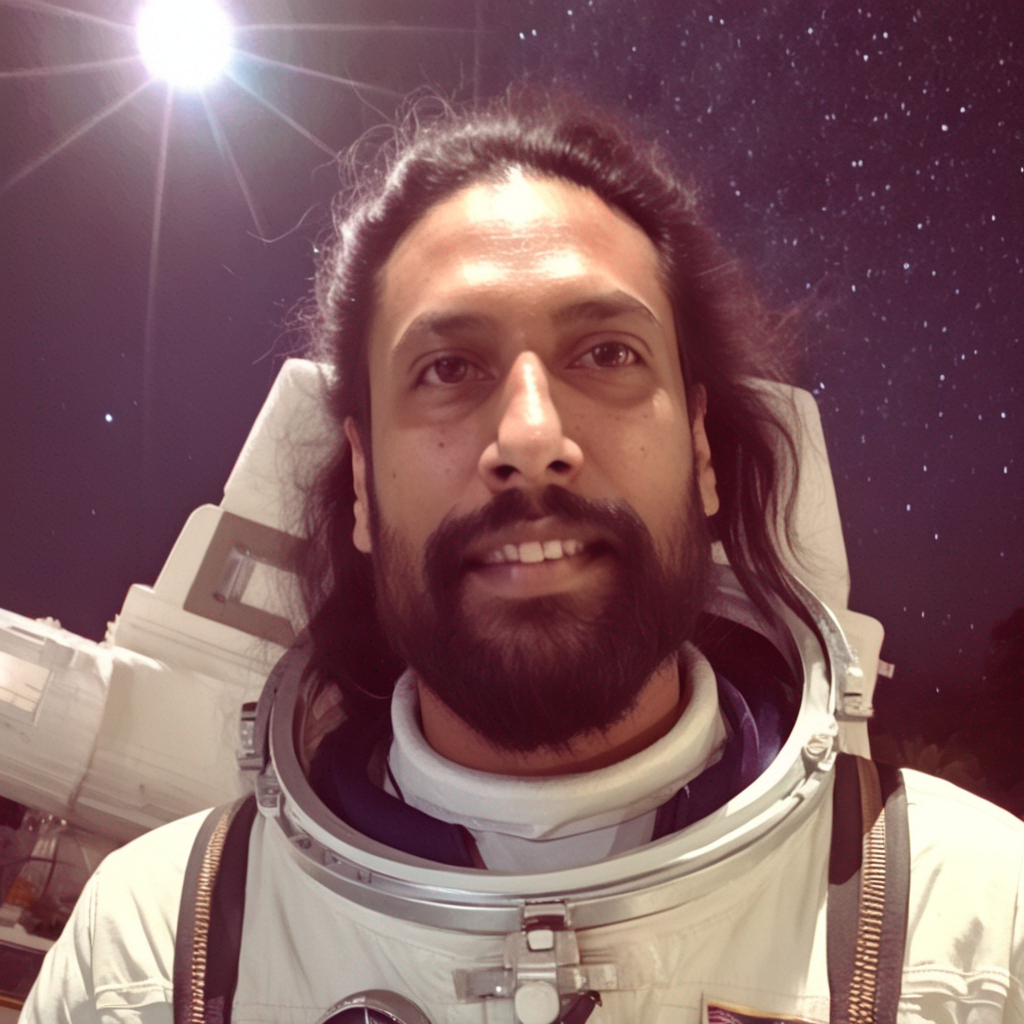

/content/output/generated_image_1.png


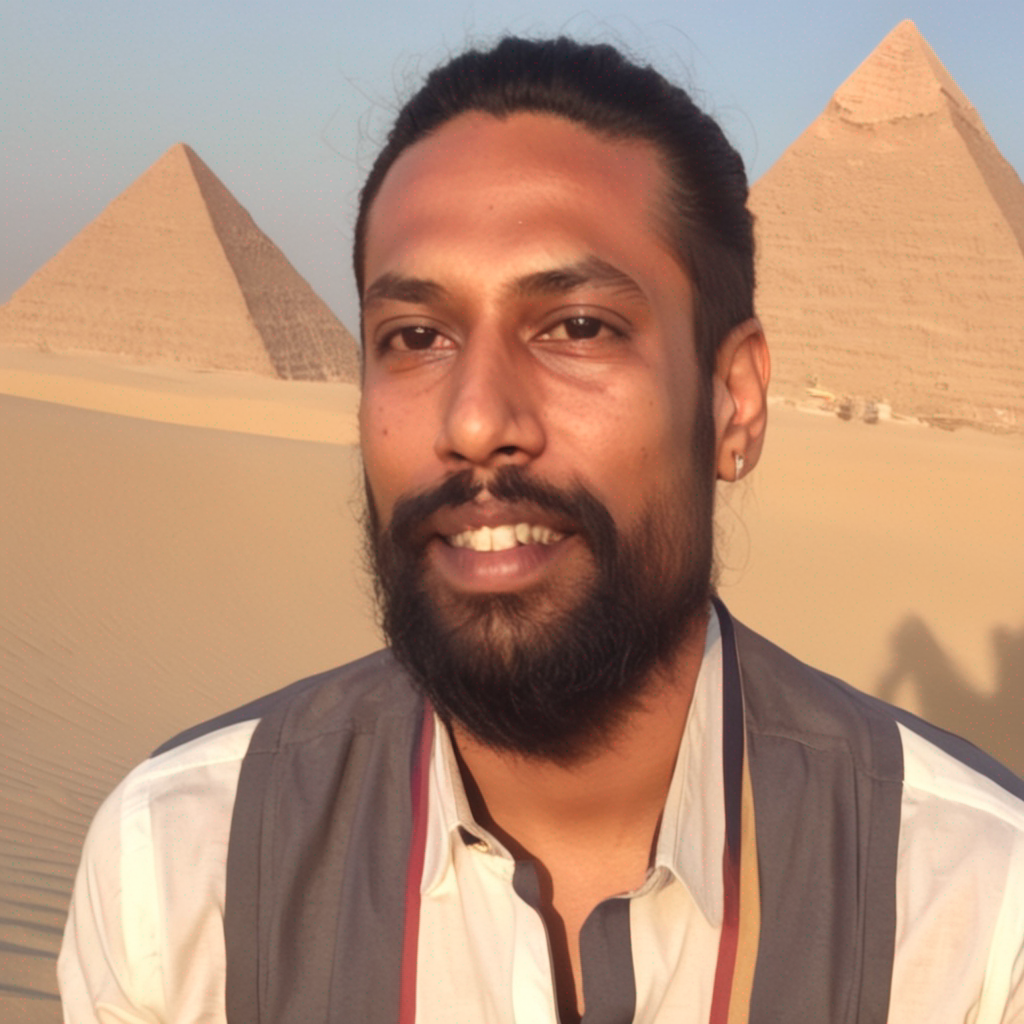

/content/output/generated_image_2.png


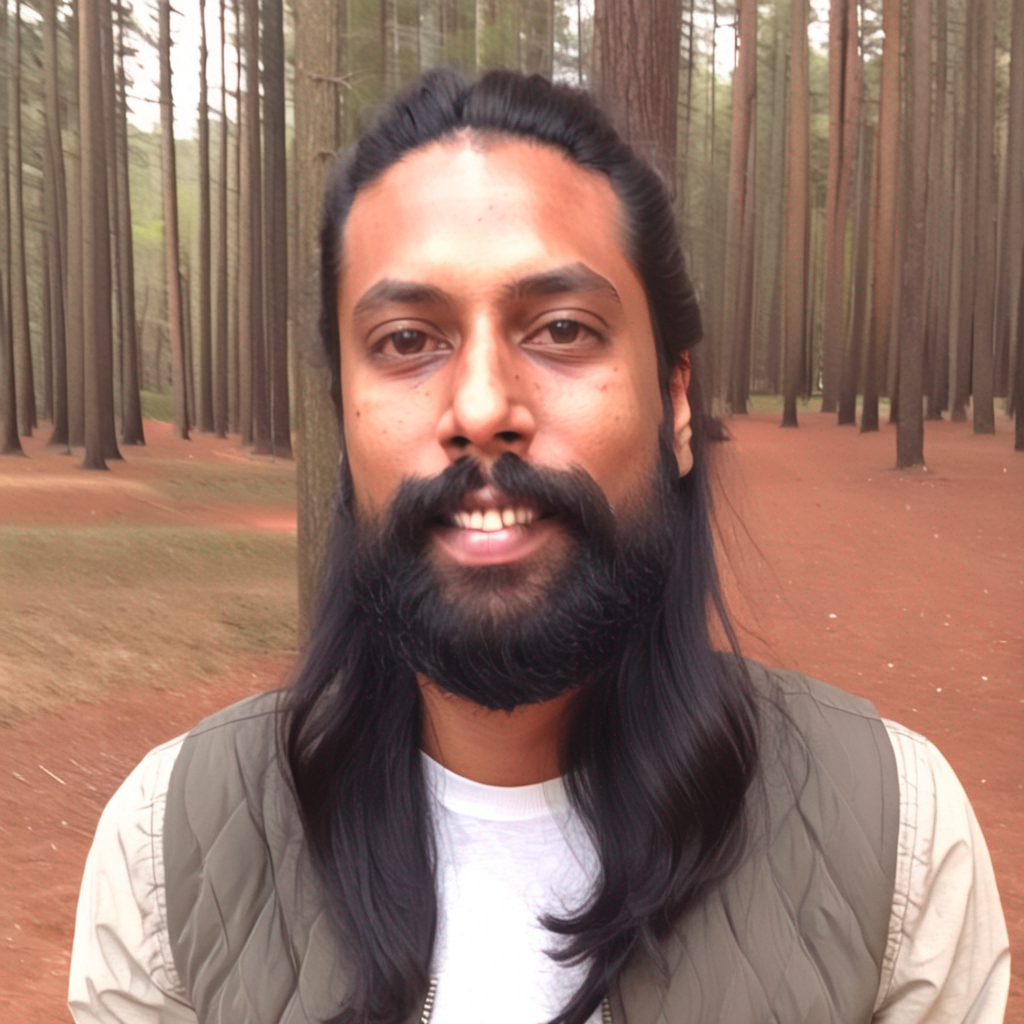

/content/output/generated_image_0.png


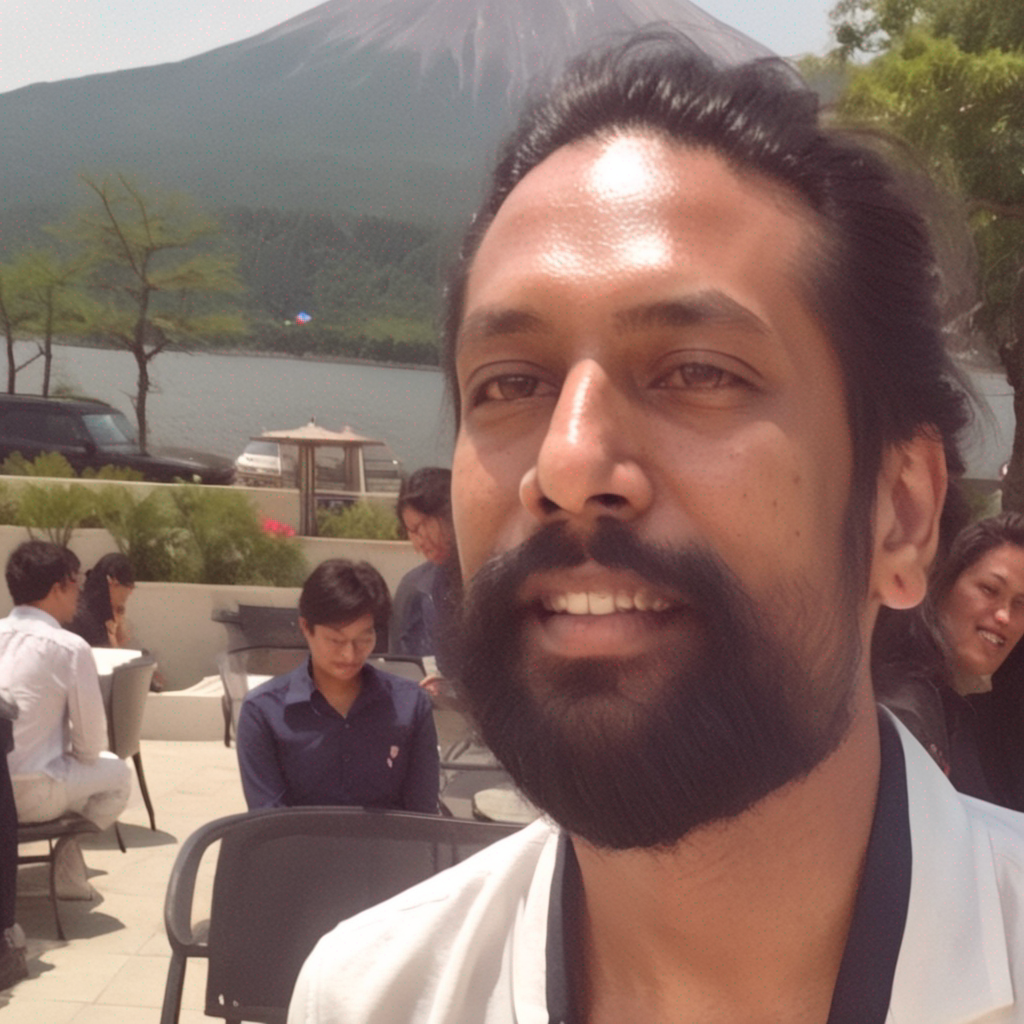

/content/output/generated_image_4.png


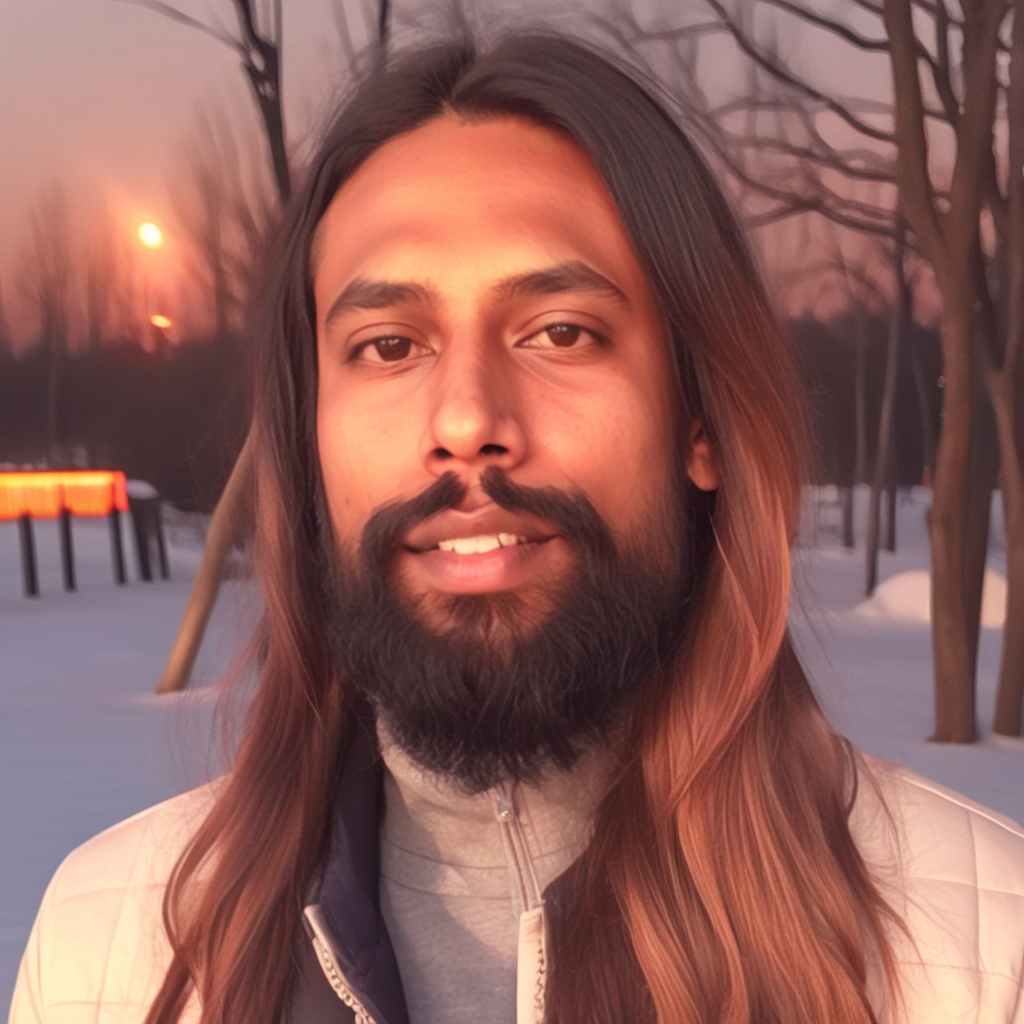

In [ ]:
import cv2
import glob
from IPython.display import Image, display
path = "/content/output/*.*"
for file in glob.glob(path):
   print(file)
   display(Image(file))
